https://scikit-learn.org/stable/modules/grid_search.html

https://www.geeksforgeeks.org/how-to-find-the-optimal-value-of-k-in-knn/

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://www.geeksforgeeks.org/k-nearest-neighbours/

### 🟦 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:98% !important; }</style>"))

### 🟦 Getting Cleaned Data from Repository

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Alireza-Esp/VFCPM/refs/heads/main/Data/data-cleaned.csv")

In [3]:
data

Model year   Make          Vehicle class  Engine size (L)  Cylinders  \
0            1995  Acura             Subcompact              1.8          4   
1            1995  Acura             Subcompact              1.8          4   
2            1995  Acura             Subcompact              1.8          4   
3            1995  Acura                Compact              3.2          6   
4            1995  Acura                Compact              3.2          6   
...           ...    ...                    ...              ...        ...   
26913        2024  Volvo          Station wagon              2.0          4   
26914        2024  Volvo          Station wagon              2.0          4   
26915        2024  Volvo  Sport utility vehicle              2.0          4   
26916        2024  Volvo  Sport utility vehicle              2.0          4   
26917        2024  Volvo  Sport utility vehicle              2.0          4   

      Transmission  Number of gears         Fuel type  City (L/100 km)  \
0                A                4  Regular gasoline             11.6   
1                M                5  Regular gasoline             11.0   
2                M                5  Premium gasoline             10.8   
3                A                4  Premium gasoline             14.2   
4                A                4  Premium gasoline             14.6   
...            ...              ...               ...              ...   
26913           AS                8  Premium gasoline             10.0   
26914           AS                8  Premium gasoline             10.7   
26915           AS                8  Premium gasoline              9.9   
26916           AS                8  Premium gasoline             10.6   
26917           AS                8  Premium gasoline             10.9   

       Highway (L/100 km)  Combined (L/100 km)  CO2 emissions (g/km)  
0                     8.3                 10.1                   232  
1                     8.3                  9.8                   225  
2                     8.3                  9.7                   223  
3                    10.5                 12.5                   288  
4                    11.0                 13.0                   299  
...                   ...                  ...                   ...  
26913                 7.5                  8.9                   207  
26914                 8.1                  9.5                   223  
26915                 7.8                  9.0                   210  
26916                 8.3                  9.6                   226  
26917                 8.6                  9.8                   230  

[26918 rows x 12 columns]

### 🟦 Data Preprocesing

🔹 Showing th Correlation of variables of dataset

<Axes: >

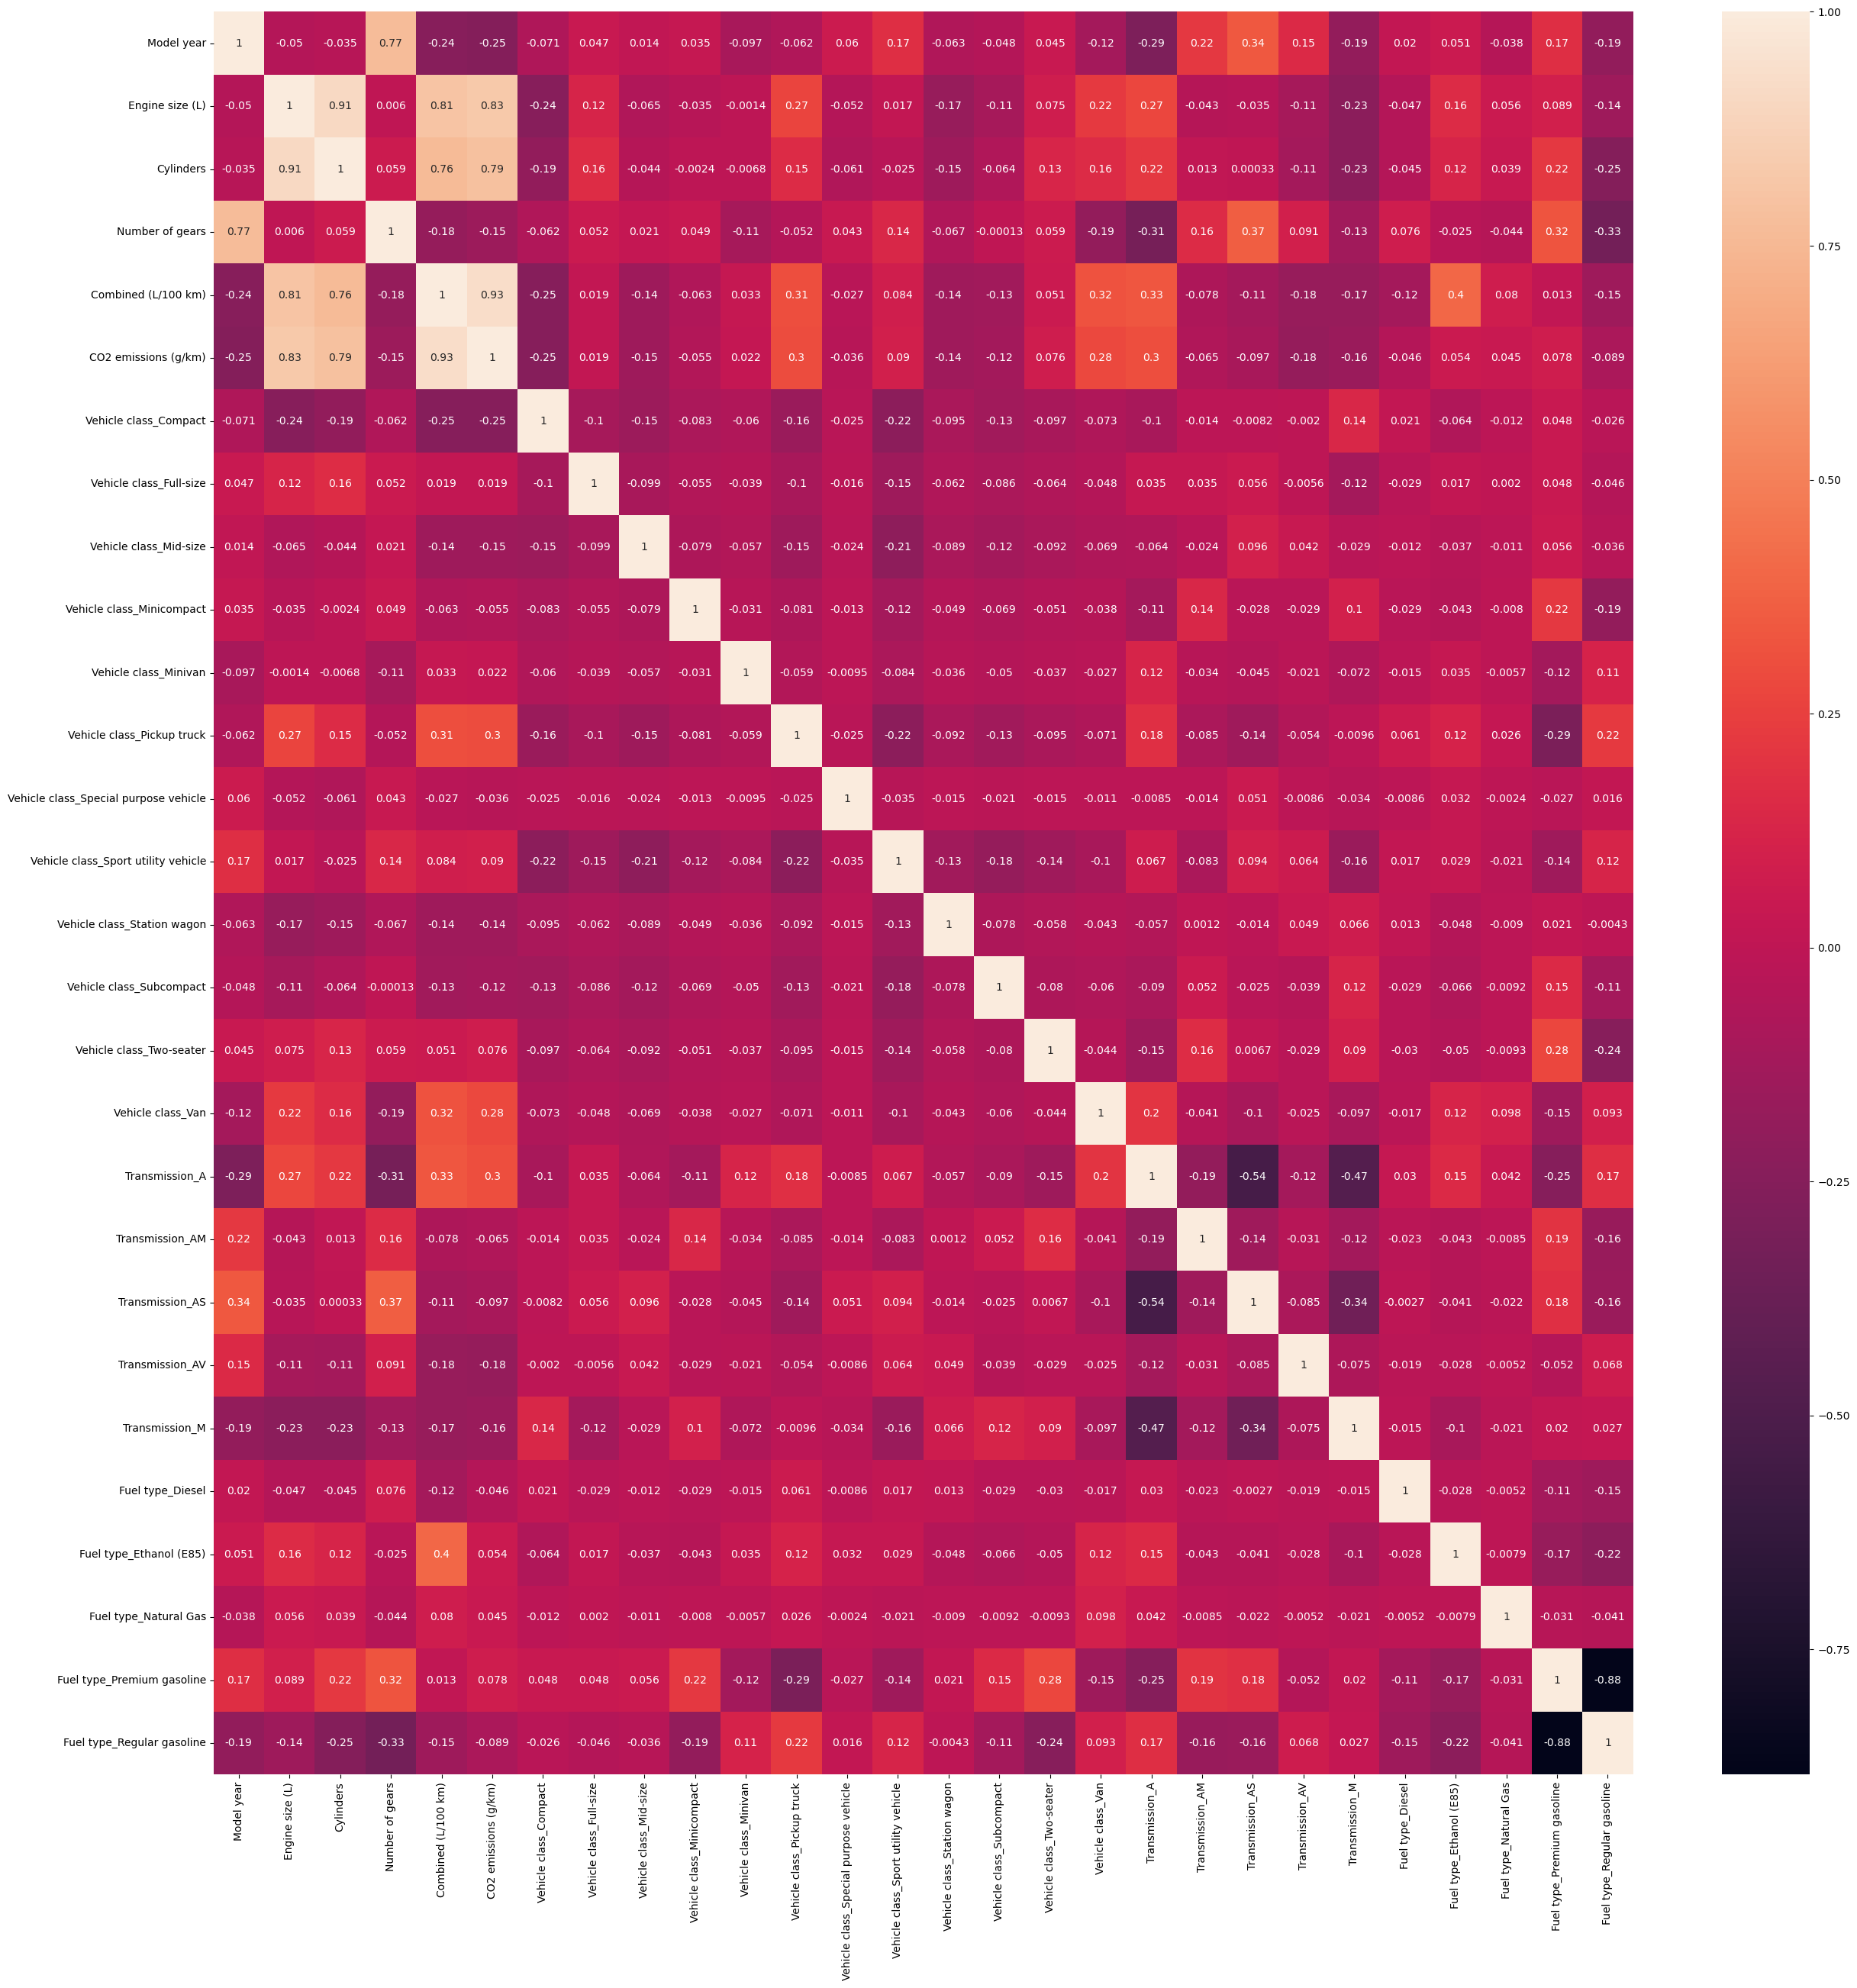

In [4]:
corr = pd.get_dummies(data[["Vehicle class", "Transmission","Fuel type", "Model year", "Engine size (L)", "Cylinders", "Number of gears", "Combined (L/100 km)", "CO2 emissions (g/km)"]]).corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr, annot=True)

🔹 Splitting Data to Categorical and Numerical X and y sets

In [5]:
X_cat = data.loc[:, ["Make", "Vehicle class", "Transmission","Fuel type"]]
X_num = data.loc[:, ["Model year", "Engine size (L)", "Cylinders", "Number of gears"]]
y_fuel = data.loc[:, ["Combined (L/100 km)"]]
y_CO2 = data.loc[:, ["CO2 emissions (g/km)"]]

🔹 Encoding categorical data (X_cat)

In [6]:
encoder = OneHotEncoder()

X_cat_ENCODED = pd.DataFrame(encoder.fit_transform(X_cat).toarray())
X_cat_ENCODED.columns = X_cat_ENCODED.columns.astype(str)

with open("encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)

In [7]:
X_cat_ENCODED

0    1    2    3    4    5    6    7    8    9  ...   66   67   68  \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
26914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
26915  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
26916  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
26917  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   

        69   70   71   72   73   74   75  
0      0.0  0.0  0.0  0.0  0.0  0.0  1.0  
1      0.0  1.0  0.0  0.0  0.0  0.0  1.0  
2      0.0  1.0  0.0  0.0  0.0  1.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
26913  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
26914  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
26915  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
26916  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
26917  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[26918 rows x 76 columns]

In [8]:
encoder.transform([["Chevrolet", "Station wagon", "M", "Premium gasoline"]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [9]:
encoder.inverse_transform([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]])

array([['Chrysler', 'Minivan', 'AM', 'Premium gasoline']], dtype=object)

In [10]:
X_new = pd.concat([X_cat_ENCODED, X_num], axis=1)

In [11]:
X_new

0    1    2    3    4    5    6    7    8    9  ...   70   71   72  \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
26914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
26915  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
26916  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
26917  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        73   74   75  Model year  Engine size (L)  Cylinders  Number of gears  
0      0.0  0.0  1.0        1995              1.8          4                4  
1      0.0  0.0  1.0        1995              1.8          4                5  
2      0.0  1.0  0.0        1995              1.8          4                5  
3      0.0  1.0  0.0        1995              3.2          6                4  
4      0.0  1.0  0.0        1995              3.2          6                4  
...    ...  ...  ...         ...              ...        ...              ...  
26913  0.0  1.0  0.0        2024              2.0          4                8  
26914  0.0  1.0  0.0        2024              2.0          4                8  
26915  0.0  1.0  0.0        2024              2.0          4                8  
26916  0.0  1.0  0.0        2024              2.0          4                8  
26917  0.0  1.0  0.0        2024              2.0          4                8  

[26918 rows x 80 columns]

🔹 Splitting X and y to train and test sets

In [12]:
X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X_new, y_fuel, test_size=0.15, random_state=0)
X_train, X_test, y_train_CO2, y_test_CO2 = train_test_split(X_new, y_CO2, test_size=0.15, random_state=0)

🔹 Standardizng X_train data

In [13]:
standardizer = StandardScaler()

X_train_STANDARDED = standardizer.fit_transform(X_train)

with open("standardizer.pkl", "wb") as standardizer_file:
    pickle.dump(standardizer, standardizer_file)

In [14]:
pd.DataFrame(X_train_STANDARDED)

0         1         2         3         4         5         6   \
0     -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
1     -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
2     -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
3     -0.109073 -0.046327 -0.066256 -0.190347  3.801187 -0.080962 -0.021932   
4     -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
...         ...       ...       ...       ...       ...       ...       ...   
22875 -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
22876 -0.109073 -0.046327 -0.066256 -0.190347  3.801187 -0.080962 -0.021932   
22877 -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
22878 -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   
22879 -0.109073 -0.046327 -0.066256 -0.190347 -0.263076 -0.080962 -0.021932   

             7         8         9   ...        70        71        72  \
0     -0.113895 -0.137244 -0.322708  ...  1.838875 -0.135247 -0.205491   
1     -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
2     -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
3     -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
4     -0.113895 -0.137244  3.098776  ...  1.838875 -0.135247 -0.205491   
...         ...       ...       ...  ...       ...       ...       ...   
22875 -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
22876 -0.113895 -0.137244 -0.322708  ... -0.543811  7.393856 -0.205491   
22877 -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
22878 -0.113895 -0.137244 -0.322708  ... -0.543811 -0.135247 -0.205491   
22879 -0.113895 -0.137244 -0.322708  ...  1.838875 -0.135247 -0.205491   

             73        74        75        76        77        78        79  
0     -0.038005  1.213443 -1.073970  0.333917 -1.025741 -1.040017  0.072784  
1     -0.038005 -0.824101  0.931125 -1.005007 -0.801176 -1.040017 -0.559210  
2     -0.038005  1.213443 -1.073970 -0.031244  1.219913  1.181120  1.336773  
3     -0.038005  1.213443 -1.073970  1.672842 -0.277190  0.070551  1.336773  
4     -0.038005 -0.824101  0.931125 -0.883287 -0.876031 -1.040017 -0.559210  
...         ...       ...       ...       ...       ...       ...       ...  
22875 -0.038005  1.213443 -1.073970 -0.031244  2.492451  3.402257  0.072784  
22876 -0.038005 -0.824101 -1.073970  0.820799 -1.025741 -1.040017  1.336773  
22877 -0.038005  1.213443 -1.073970 -0.396405  0.920493  1.181120  1.336773  
22878 -0.038005 -0.824101  0.931125 -0.274685 -0.501755  0.070551 -0.559210  
22879 -0.038005 -0.824101  0.931125 -1.491889 -0.651466 -1.040017 -0.559210  

[22880 rows x 80 columns]

🔹 Training the model

In [15]:
model_fuel = KNeighborsRegressor(n_neighbors=2, metric="euclidean")
model_CO2 = KNeighborsRegressor(n_neighbors=2, metric="euclidean")

model_fuel.fit(X_train_STANDARDED, y_train_fuel)
model_CO2.fit(X_train_STANDARDED, y_train_CO2)

with open("model-fuel.pkl", "wb") as model_fuel_file:
    pickle.dump(model_fuel, model_fuel_file)
with open("model-CO2.pkl", "wb") as model_CO2_file:
    pickle.dump(model_CO2, model_CO2_file)

In [16]:
y_pred_fuel = model_fuel.predict(standardizer.transform(X_test))
y_pred_CO2 = model_CO2.predict(standardizer.transform(X_test))

  File "C:\Users\Alireza-esp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Alireza-esp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Alireza-esp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Alireza-esp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [17]:
print("For fuel model:")
print("   R2 Score =  " + str(r2_score(y_test_fuel, y_pred_fuel).round(3) * 100) + "%")
print("   MSE = " + str(mean_squared_error(y_test_fuel, y_pred_fuel).round(2)))
print("   MAE = " + str(mean_absolute_error(y_test_fuel, y_pred_fuel).round(2)))

print("For CO2 model:")
print("   R2 Score = " + str(r2_score(y_test_CO2, y_pred_CO2).round(3) * 100) + "%")
print("   MSE = " + str(mean_squared_error(y_test_CO2, y_pred_CO2).round(2)))
print("   MAE = " + str(mean_absolute_error(y_test_CO2, y_pred_CO2).round(2)))

For fuel model:
   R2 Score =  94.6%
   MSE = 0.54
   MAE = 0.47
For CO2 model:
   R2 Score = 93.4%
   MSE = 281.31
   MAE = 10.67


🔹 Finding best values for hyperparameters of model

for 1 neighbor:
   R2_score for fuel model = 93.4%
   R2_score for CO2 model = 91.9%
   MSE for fuel model = 0.66
   MSE for CO2 model = 344.35
   MAE for fuel model = 0.49
   MAE for CO2 model = 11.25

for 2 neighbor:
   R2_score for fuel model = 94.6%
   R2_score for CO2 model = 93.4%
   MSE for fuel model = 0.54
   MSE for CO2 model = 281.31
   MAE for fuel model = 0.47
   MAE for CO2 model = 10.67

for 3 neighbor:
   R2_score for fuel model = 94.6%
   R2_score for CO2 model = 93.4%
   MSE for fuel model = 0.54
   MSE for CO2 model = 279.95
   MAE for fuel model = 0.48
   MAE for CO2 model = 10.98

for 4 neighbor:
   R2_score for fuel model = 94.3%
   R2_score for CO2 model = 93.2%
   MSE for fuel model = 0.56
   MSE for CO2 model = 291.78
   MAE for fuel model = 0.5
   MAE for CO2 model = 11.48

for 5 neighbor:
   R2_score for fuel model = 94.1%
   R2_score for CO2 model = 92.9%
   MSE for fuel model = 0.59
   MSE for CO2 model = 305.44
   MAE for fuel model = 0.52
   MAE for CO2 m

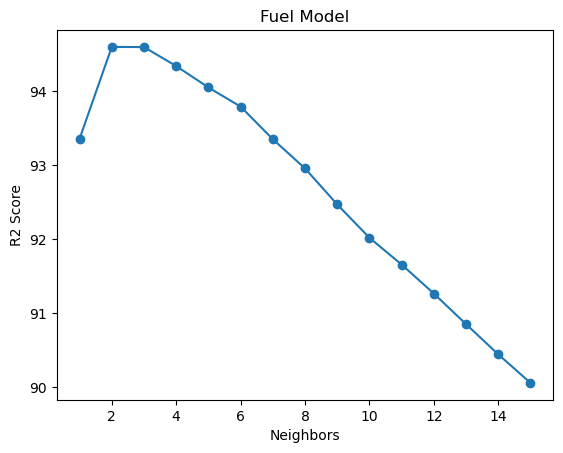

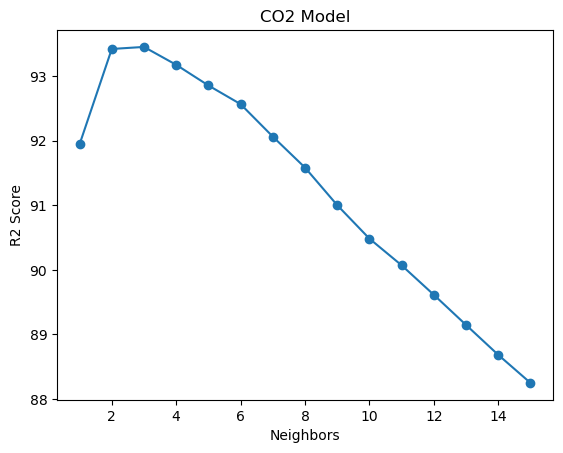

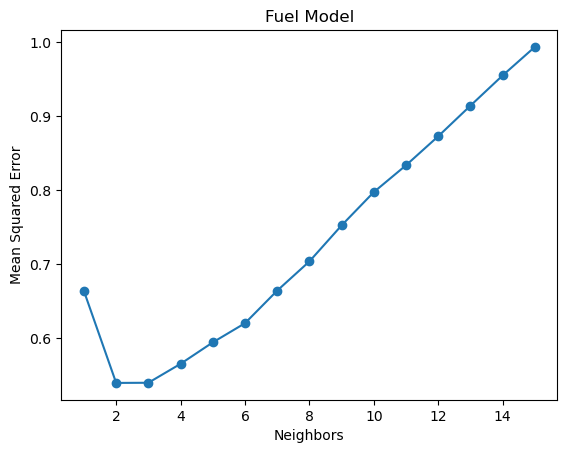

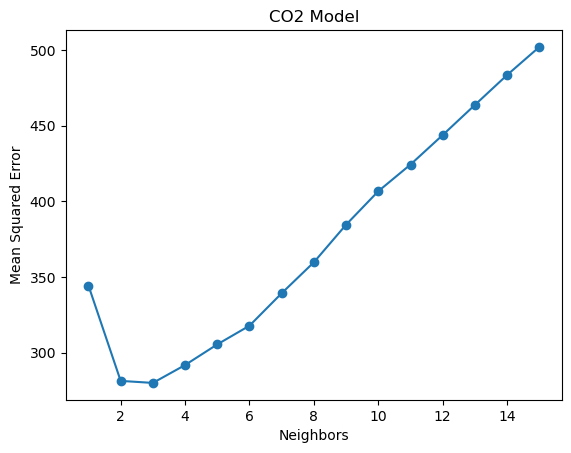

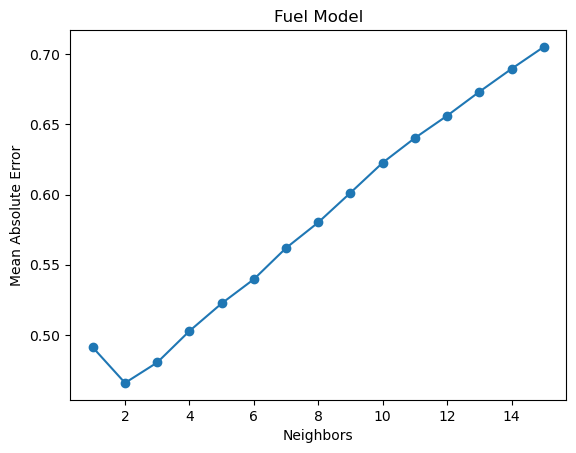

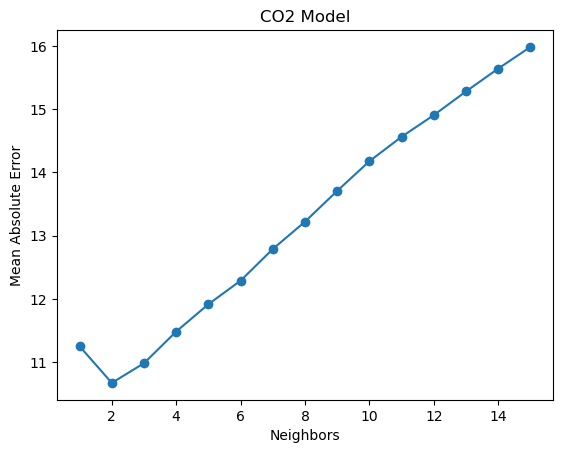

In [18]:
list_neighbors = list(range(1,16))
list_r2_fuel = []
list_r2_CO2 = []
list_mse_fuel = []
list_mse_CO2 = []
list_mae_fuel = []
list_mae_CO2 = []


for i in range(1,16):
    model_fuel = KNeighborsRegressor(n_neighbors=i)
    model_CO2 = KNeighborsRegressor(n_neighbors=i)

    model_fuel.fit(X_train_STANDARDED, y_train_fuel)
    model_CO2.fit(X_train_STANDARDED, y_train_CO2)
    
    y_pred_fuel = model_fuel.predict(standardizer.transform(X_test))
    list_r2_fuel.append(r2_score(y_test_fuel, y_pred_fuel)*100)
    list_mse_fuel.append(mean_squared_error(y_test_fuel, y_pred_fuel))
    list_mae_fuel.append(mean_absolute_error(y_test_fuel, y_pred_fuel))
    
    y_pred_CO2 = model_CO2.predict(standardizer.transform(X_test))
    list_r2_CO2.append(r2_score(y_test_CO2, y_pred_CO2)*100)
    list_mse_CO2.append(mean_squared_error(y_test_CO2, y_pred_CO2))
    list_mae_CO2.append(mean_absolute_error(y_test_CO2, y_pred_CO2))
    
    print(f"for {i} neighbor:")
    print(f"   R2_score for fuel model = " + str(r2_score(y_test_fuel, y_pred_fuel).round(3) * 100) + "%")
    print(f"   R2_score for CO2 model = " + str(r2_score(y_test_CO2, y_pred_CO2).round(3) * 100) + "%")
    print(f"   MSE for fuel model = " + str(mean_squared_error(y_test_fuel, y_pred_fuel).round(2)))
    print(f"   MSE for CO2 model = " + str(mean_squared_error(y_test_CO2, y_pred_CO2).round(2)))
    print(f"   MAE for fuel model = " + str(mean_absolute_error(y_test_fuel, y_pred_fuel).round(2)))
    print(f"   MAE for CO2 model = " + str(mean_absolute_error(y_test_CO2, y_pred_CO2).round(2)) + "\n")
    
                       
plt.scatter(list_neighbors, list_r2_fuel)
plt.plot(list_neighbors, list_r2_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("R2 Score")
plt.show()

plt.scatter(list_neighbors, list_r2_CO2)
plt.plot(list_neighbors, list_r2_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("R2 Score")
plt.show()

plt.scatter(list_neighbors, list_mse_fuel)
plt.plot(list_neighbors, list_mse_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Squared Error")
plt.show()

plt.scatter(list_neighbors, list_mse_CO2)
plt.plot(list_neighbors, list_mse_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Squared Error")
plt.show()

plt.scatter(list_neighbors, list_mae_fuel)
plt.plot(list_neighbors, list_mae_fuel)
plt.title("Fuel Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Absolute Error")
plt.show()

plt.scatter(list_neighbors, list_mae_CO2)
plt.plot(list_neighbors, list_mae_CO2)
plt.title("CO2 Model")
plt.xlabel("Neighbors")
plt.ylabel("Mean Absolute Error")
plt.show()